<a href="https://colab.research.google.com/github/mbasacokile7/Breast_Cancer_Prediction/blob/main/MNIST_Model(Wide_%26_Deepp_Architecture).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wide & Deep Model Architecture as a Digit Recognizer.
The goal of this notebook is to try and implement the Wide & Deep model architecture and train it on the MNIST and QMNIST dataset. The modelarchecture is shown below:


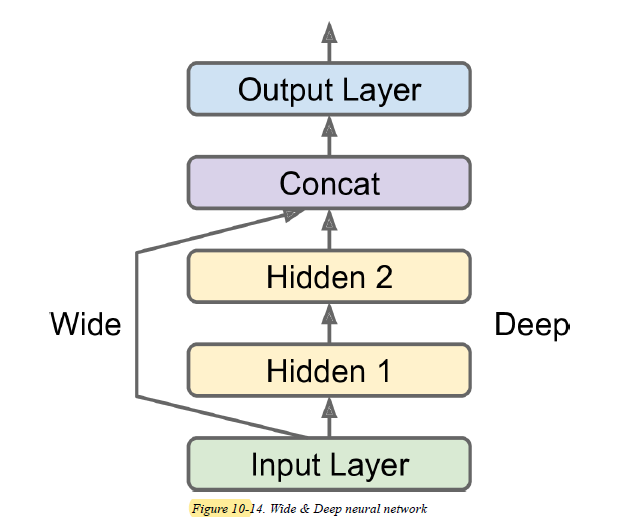

# Construct the Model using Keras Functional API 

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Concatenate
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
# Model will be built using the Functional API from the Keras API

# Start with the two input layers
input_a = Input(shape = (28, 28, 1))
input_b = Input(shape = (28, 28, 1))

#The model is divided into paths: A: Deep Path and B: Wide Path

#Construct the Deep Path
conv_deep_1 = Conv2D(filters = 64, kernel_size = (3,3), activation = "relu")(input_a)
max_deep_1 = MaxPooling2D((2,2))(conv_deep_1)
conv_deep_2 = Conv2D(filters = 64, kernel_size = (3,3), activation = "relu")(max_deep_1)
max_deep_2 = MaxPooling2D((2,2))(conv_deep_2)
conv_deep_3 = Conv2D(filters = 64, kernel_size = (3,3), activation = "relu")(max_deep_2)
max_deep_3 = MaxPooling2D((2,2))(conv_deep_3)

#Construct the Wide Path
conv_wide_1 = Conv2D(filters = 64, kernel_size = (3,3), activation = "relu")(input_b)
max_wide_1 = MaxPooling2D((2,2))(conv_wide_1)
conv_wide_2 = Conv2D(filters = 64, kernel_size = (3,3), activation = "relu")(max_wide_1)
max_wide_2 = MaxPooling2D((2,2))(conv_wide_2)
conv_wide_3 = Conv2D(filters = 64, kernel_size = (3,3), activation = "relu")(max_wide_2)
max_wide_3 = MaxPooling2D((2,2))(conv_wide_3)

# Join the Deep and Wide Paths
concat = Concatenate()([max_deep_3, max_wide_3])

# Add Hidden Layers
hidden_1 = Dense(units = 1024, activation="relu")(concat)
hidden_2 = Dense(units = 1024, activation="relu")(hidden_1)

# Add Output Layer
output = Dense(units = 1024, activation="relu")(hidden_2)

#Consilidate the COnstruct of the model
model = Model(inputs = [input_a, input_b], outputs = output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 26, 26, 64)   640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 26, 26, 64)   640         input_2[0][0]                    
______________________________________________________________________________________________

# Load, Process and Visualisation Data

In [3]:
# load the mnist data
mnist = keras.datasets.mnist 
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()

In [4]:
# Install Kaggle Library
! pip install kaggle


In [5]:
# Make a Kaggle Directory
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
# Copy Json File into Kaggle Directory
! cp kaggle.json ~/.kaggle/

In [7]:
# Allocate the required permission for the file
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
# Download Qmnist Dataset
! kaggle datasets download fedesoriano/qmnist-the-extended-mnist-dataset-120k-images

qmnist-the-extended-mnist-dataset-120k-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
!unzip "qmnist-the-extended-mnist-dataset-120k-images.zip" -d "qmnist/"

Archive:  qmnist-the-extended-mnist-dataset-120k-images.zip
replace qmnist/MNIST-120k? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: qmnist/MNIST-120k       
replace qmnist/cite.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: qmnist/cite.txt         


In [10]:
#Function to load qminst
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [11]:
# Load QMNIST data
qmnist = unpickle("qmnist/MNIST-120k")

In [12]:
# Get the qmnist data and reshape it
qmnist_data = np.array(qmnist["data"])
qmnist_data = qmnist_data.reshape(-1, 28, 28, 1)

In [13]:
# Get the qmnist labels:
qmnist_labels = np.array(qmnist["labels"])

In [14]:
# Reshape The Mnist data
X_train_mnist, X_test_mnist = X_train_mnist.reshape(-1, 28,28, 1), X_test_mnist.reshape(-1, 28,28, 1)

In [19]:
qmnist_labels = qmnist_labels.reshape(-1,)
print(qmnist_labels.shape, y_train_1.shape)

(120000,) (70000,)


In [20]:
# Join the QMNIST and MNIST Datasets

X_train_1 = np.concatenate((X_train_mnist, X_test_mnist))
X_train_full = np.concatenate((qmnist_data, X_train_1))
y_train_1 = np.concatenate((y_train_mnist,y_test_mnist))
y_train_full = np.concatenate((qmnist_labels, y_train_1))

In [26]:
# View shapes

print(X_train_full.shape, y_train_full.shape)

(190000, 28, 28, 1) (190000,)


In [27]:
X_train_full_test = X_train_full.reshape(-1, 28, 28)

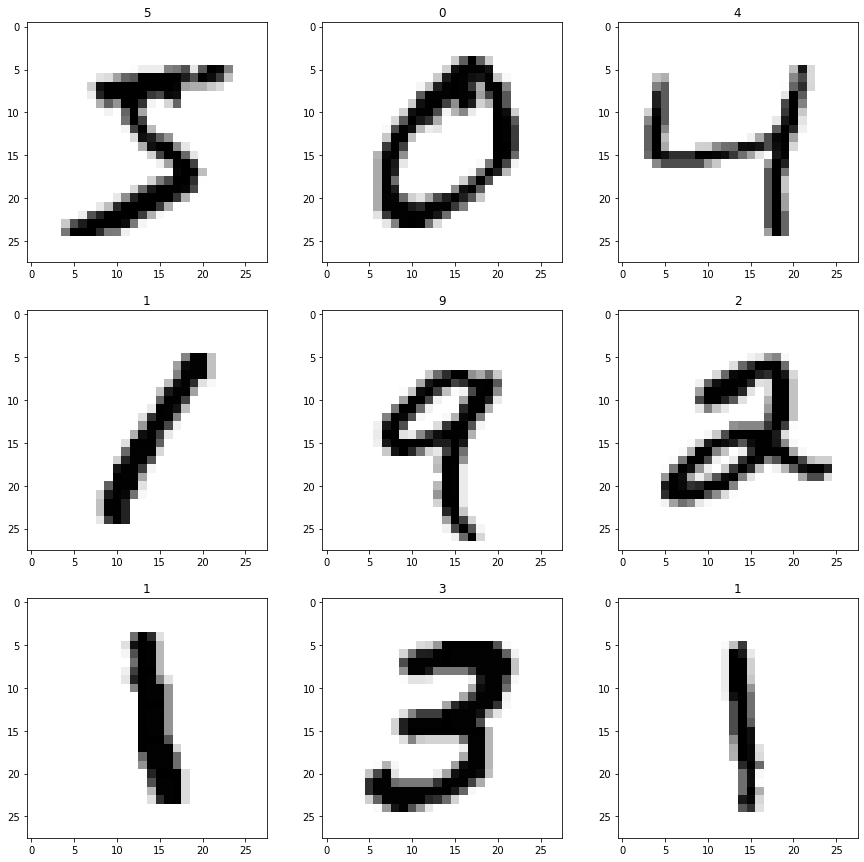

In [31]:
# View a few images

figure = plt.figure(figsize = (15,15))

for i in range(0, 9, 1):
    ax = figure.add_subplot(3, 3, i+1)
    image = plt.imshow(X_train_full_test[i], cmap = "binary")
    ax.set_title(y_train_full[i])

In [33]:
# Normalize the pixel values
X_train_full_2 = X_train_full.copy()
X_train_full_2 = X_train_full_2/255.0

## Train the model with no image augmentation

In [ ]:
# Train, Validation split
from sklearn.model_selection import train_test_split
features_train, features_val, labels_train, labels_val = train_test_split(X_train_full_2, y_train_full, test_size = 0.25, random_state = 42)

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = Adam(learning_rate = 0.0001), metrics = ["accuracy"])

In [ ]:
# create callbacks

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                 factor=0.1,
                                                 patience=5,
                                                 min_lr=0.000001,
                                                 verbose=1)

In [ ]:
# Split the data into